In [1]:
# ---------------------------------------------------------------

# ----------------- results model performance

# ---------------------------------------------------------------


# ¡¡¡ --- !!! # ---> modules and data cases

# --- system modules

import sys
import datetime
import os


base_dir = os.path.abspath(os.getcwd() + "/..")

# --- data handling modules

import numpy as np
import pandas as pd
import scipy.io as sp_io
import scipy as sp

# --- visualization modules

import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import rcParams
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# --- my modules

methods_dir = base_dir + '/methods/'  
sys.path.insert(0, methods_dir)
from class_sample_selection import sample_selection
import simpls_module



# ¡¡¡ --- !!! # ---> base working directory and available data cases

# # ************************************ init --- user 
caseID_key = "d02_manure"
y_id = 1 # DM
# # ************************************ end --- user 



# # ¡¡¡ --- !!! # ---> data

mat_filename = base_dir + "/data/" + caseID_key +".mat"
data_mat = sp_io.loadmat(mat_filename, struct_as_record = False)



xcal = data_mat["xcal"].copy()
ycal = data_mat["ycal"].copy()[:,[y_id]]
xtest = data_mat["xtest"].copy()
ytest = data_mat["ytest"].copy()[:,[y_id]]
chemical_comp_name = data_mat["y_labels"][y_id]


test_groups = np.ones(xtest.shape[0]).astype(int)

print(xcal.shape)
print(xtest.shape)

print("--- data ready ---")







(420, 141)
(164, 141)
--- data ready ---


In [2]:
# --- get all results

df_design_pls = pd.read_pickle(base_dir + "/scripts_output/" + caseID_key + "_" + chemical_comp_name + "_numba_02_pls_performance.pkl")
method_name_match = [("random","RAND"),("ks","KS"),("duplex","DUP"),("puchwein","PUCH"),("clustering","CL"),("optfederov","D-OPT")]

method_name_match_df = pd.DataFrame(method_name_match)
method_name_match_df.columns = ["method_name","method_name_display"]
method_name_match_df

df_design_pls = df_design_pls.merge(method_name_match_df, how="left",left_on = "method_name", right_on = "method_name")
df_design_pls.shape
df_design_pls.columns

Index(['npc', 'method_name', 'sample_size', 'selected_samples', 'rmsecv',
       'rmseval', 'rmsep', 'r2cv', 'r2val', 'r2p', 'method_name_display'],
      dtype='object')

In [4]:
# --- plot color mapping

import matplotlib as mtply

npc_range = np.arange(1,26)
color_var = np.array(npc_range[0:-1])
min_color_var = np.amin(color_var)
max_color_var = np.amax(color_var)

c_m = mtply.cm.winter
norm = mtply.colors.Normalize(vmin = min_color_var, vmax = max_color_var)
s_m = mtply.cm.ScalarMappable(cmap = c_m, norm = norm)

ylims_plots = {"rmsep":[9.5, 25], "r2p":[0.1,1.1]} # DM


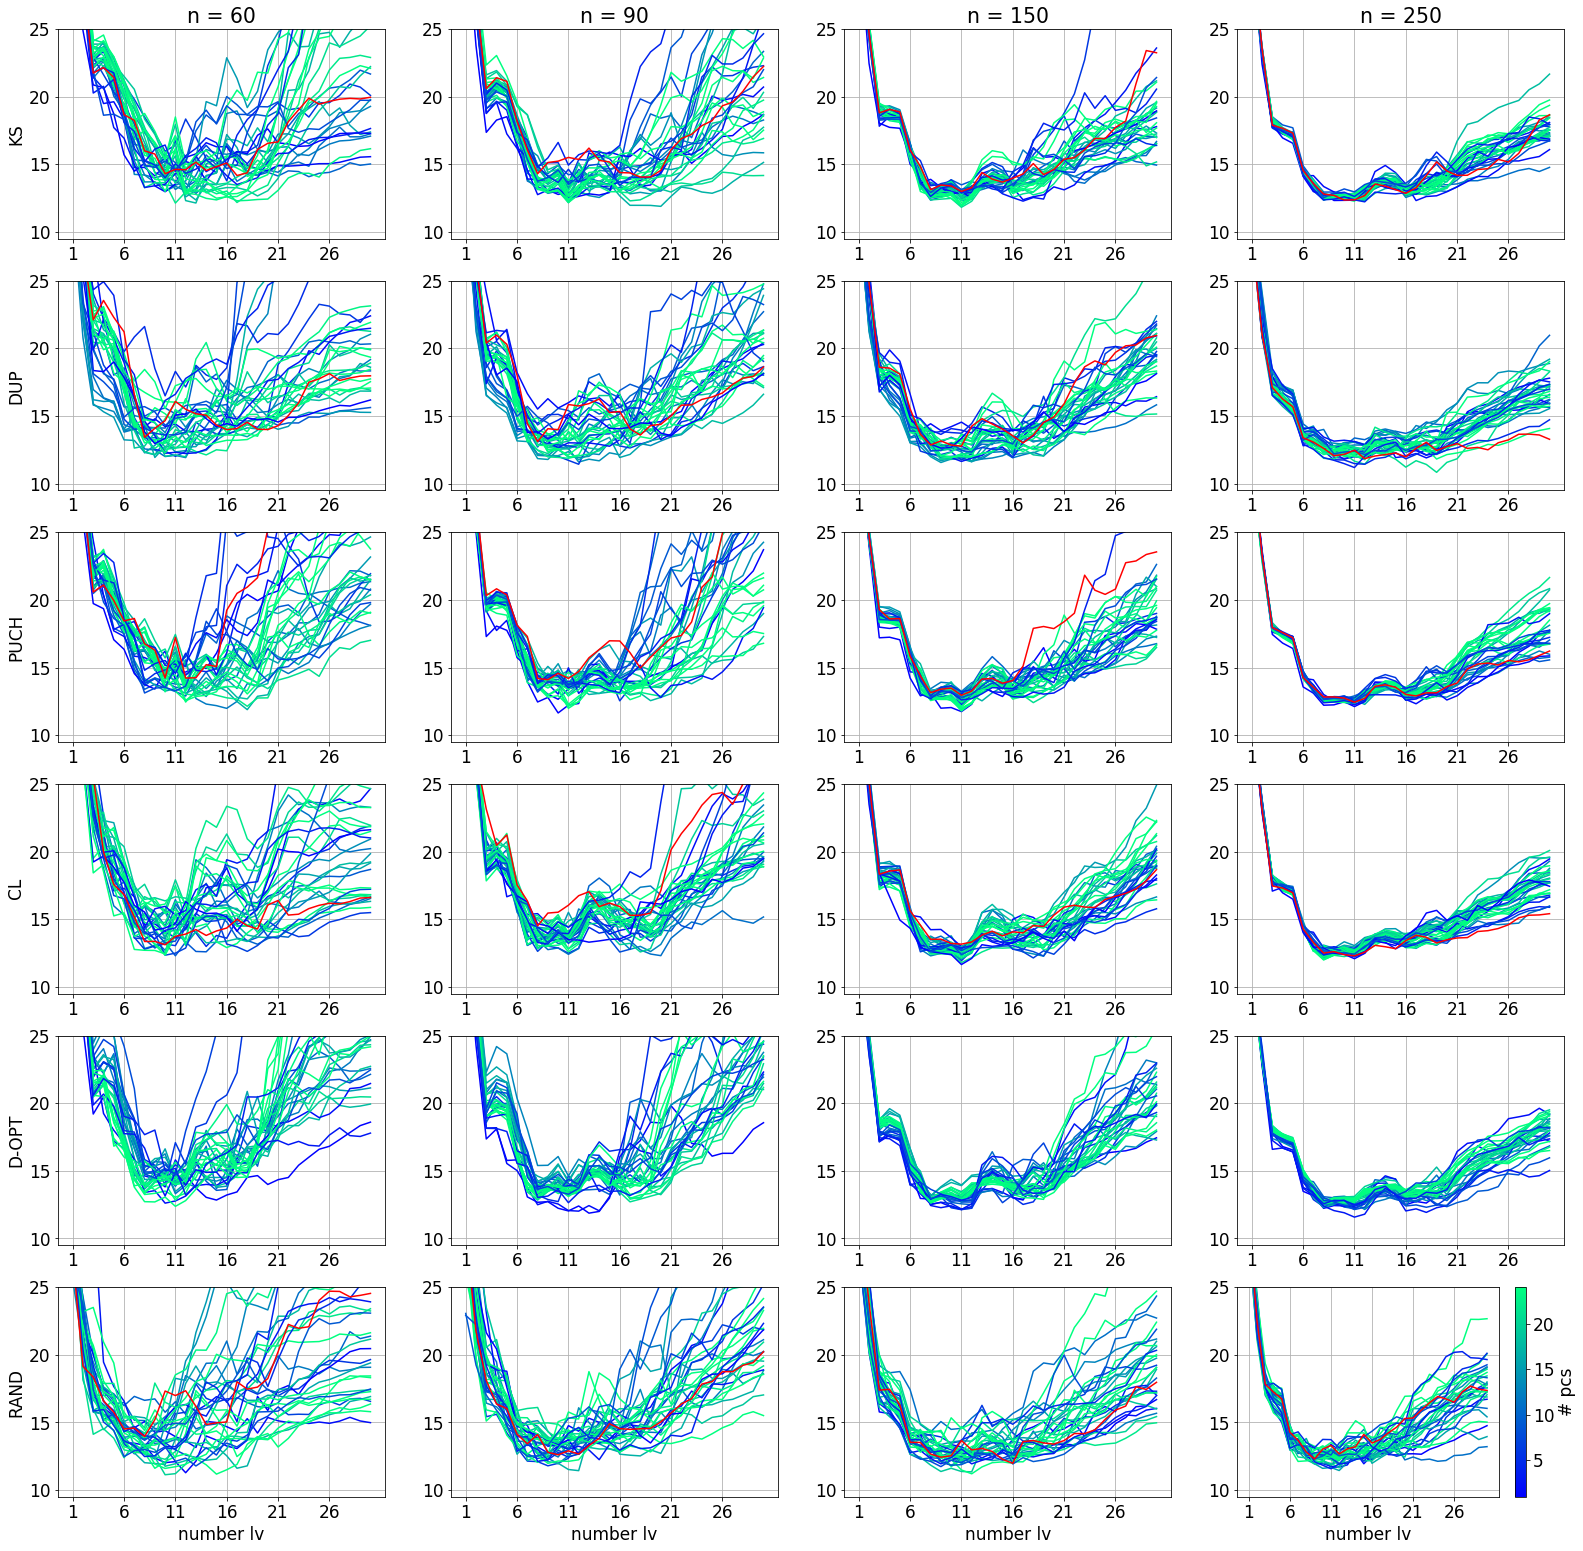

In [5]:
# --- characterization in terms of model performance

sample_sizes_plot = np.array([60,90,150,250])
variable_name = "rmsep"

ii = 0 # test group 1

plt.rcParams.update({'font.size': 17})
fig, axs = plt.subplots(nrows=6,ncols=sample_sizes_plot.shape[0],figsize = (27,27))

kk=0
for method in ['KS', 'DUP', 'PUCH', 'CL', 'D-OPT', 'RAND']:    

    for ss_ii in range(sample_sizes_plot.shape[0]):


        df_design_pls_plot = df_design_pls[(df_design_pls["method_name_display"]==method) & 
                                   (df_design_pls["npc"]<=30) & (df_design_pls["sample_size"]==sample_sizes_plot[ss_ii])]

        if method!="D-OPT":
            df_design_pls_plot_orig_input = df_design_pls[(df_design_pls["method_name_display"]==method) & 
                                   (df_design_pls["npc"]>30) & (df_design_pls["sample_size"]==sample_sizes_plot[ss_ii])]



        for row_ii in range(df_design_pls_plot.shape[0]):

            df_plot_row = df_design_pls_plot.iloc[row_ii]

            plot_values = df_plot_row[variable_name][ii,:]    
            color_tuple = s_m.to_rgba(df_plot_row["npc"])


            axs[kk,ss_ii].plot(np.arange(1, plot_values.shape[0]+1) ,plot_values, c = color_tuple)

        if method!="D-OPT":
            axs[kk,ss_ii].plot(np.arange(1, plot_values.shape[0]+1), df_design_pls_plot_orig_input.iloc[0][variable_name][ii,:], c = "red")
        axs[kk,ss_ii].grid()        
        axs[kk,ss_ii].set_ylim(ylims_plots[variable_name])
        axs[kk,ss_ii].set_xticks(np.arange(1,plot_values.shape[0]+1,5))  
        
        if kk==0:
            axs[kk,ss_ii].set_title("n = " + str(sample_sizes_plot[ss_ii]))
        if ss_ii==0:
            axs[kk,ss_ii].set_ylabel(method)
        if kk==5:
            axs[kk,ss_ii].set_xlabel("number lv")
         
         
    kk+=1


cm = plt.colorbar(s_m)
cm.set_label("# pcs")


plt.savefig(base_dir + "/manuscript/figures/"+caseID_key+"_model_performance.png",bbox_inches="tight")
plt.show()